### Importing Libraries

The following libraries are imported:

- **`json`**: For parsing JSON data.
- **`random`**: For generating random numbers.
- **`matplotlib.pyplot`**: For creating plots and visualizations.
- **`numpy`**: For numerical operations and array manipulations.


In [7]:
import json
import random
import matplotlib.pyplot as plt
import numpy as np

### Data Collection Service

The `DataCollectionService` class simulates the collection of vehicle data.

#### Methods:

- **`collect_data`**: Generates and returns a dictionary with simulated vehicle data, including:
  - **`vehicle_id`**: A random integer between 1000 and 9999.
  - **`speed`**: A random float between 0 and 120.
  - **`fuel_level`**: A random float between 0 and 100.
  - **`engine_temp`**: A random float between 50 and 120.
  - **`timestamp`**: A simulated random timestamp.


In [8]:
class DataCollectionService:
    def collect_data(self):
        return {
            "vehicle_id": random.randint(1000, 9999),
            "speed": random.uniform(0, 120),
            "fuel_level": random.uniform(0, 100),
            "engine_temp": random.uniform(50, 120),
            "timestamp": random.random()  # Simulated timestamp
        }


### Data Processing Service

The `DataProcessingService` class manages and processes vehicle data.

#### Methods:

- **`process_data(data)`**: 
  - Stores incoming data by vehicle ID.
  - Retains only the last 60 data points for each vehicle.

- **`get_vehicle_health(vehicle_id)`**: 
  - Returns the health status of the vehicle based on the latest data.
  - Checks for high engine temperature and low fuel levels.

- **`get_vehicle_performance(vehicle_id)`**: 
  - Provides average speed and the number of data points for the vehicle.


In [9]:

class DataProcessingService:
    def __init__(self):
        self.vehicle_data = {}

    def process_data(self, data):
        vehicle_id = data["vehicle_id"]
        if vehicle_id not in self.vehicle_data:
            self.vehicle_data[vehicle_id] = []
        self.vehicle_data[vehicle_id].append(data)
        # Keep only the last 60 data points (1 minute of data)
        self.vehicle_data[vehicle_id] = self.vehicle_data[vehicle_id][-60:]

    def get_vehicle_health(self, vehicle_id):
        if vehicle_id not in self.vehicle_data:
            return None
        latest_data = self.vehicle_data[vehicle_id][-1]
        health_status = "Good"
        if latest_data["engine_temp"] > 100:
            health_status = "Warning: High Engine Temperature"
        elif latest_data["fuel_level"] < 10:
            health_status = "Warning: Low Fuel"
        return {
            "vehicle_id": vehicle_id,
            "health_status": health_status,
            "last_updated": latest_data["timestamp"]
        }

    def get_vehicle_performance(self, vehicle_id):
        if vehicle_id not in self.vehicle_data:
            return None
        data = self.vehicle_data[vehicle_id]
        avg_speed = sum(d["speed"] for d in data) / len(data)
        return {
            "vehicle_id": vehicle_id,
            "average_speed": avg_speed,
            "data_points": len(data)
        }


### API Gateway

The `APIGateway` class interfaces with the `DataProcessingService` to provide data access through API-like methods.

#### Methods:

- **`get_vehicle_health(vehicle_id)`**: 
  - Retrieves the health status of the specified vehicle from the `DataProcessingService`.

- **`get_vehicle_performance(vehicle_id)`**: 
  - Retrieves performance metrics (e.g., average speed) of the specified vehicle from the `DataProcessingService`.


In [10]:

class APIGateway:
    def __init__(self, data_processor):
        self.data_processor = data_processor

    def get_vehicle_health(self, vehicle_id):
        return self.data_processor.get_vehicle_health(vehicle_id)

    def get_vehicle_performance(self, vehicle_id):
        return self.data_processor.get_vehicle_performance(vehicle_id)


### Run Simulation

The `run_simulation` function simulates data collection and processing over a specified duration.

#### Parameters:

- **`duration`**: Duration of the simulation in seconds (default is 60 seconds).

#### Functionality:

1. **Data Collection and Processing**: 
   - Collects data and processes it using `DataCollectionService` and `DataProcessingService`.
   
2. **API Calls Simulation**: 
   - Simulates API calls every 5 seconds to get vehicle health and performance using `APIGateway`.

3. **Metrics Tracking**: 
   - Tracks the number of collected data points, processed data points, API calls, and vehicle health statuses.

#### Returns:

- **`collected_data_count`**: List of counts of collected data points over time.
- **`processed_data_count`**: List of counts of processed data points over time.
- **`api_calls_count`**: List of counts of simulated API calls over time.
- **`vehicle_health_statuses`**: List of vehicle health statuses obtained during the simulation.


In [11]:

def run_simulation(duration=60):
    data_collector = DataCollectionService()
    data_processor = DataProcessingService()
    api_gateway = APIGateway(data_processor)

    collected_data_count = []
    processed_data_count = []
    api_calls_count = []
    unique_vehicles = set()
    vehicle_health_statuses = []

    for i in range(duration):
        # Collect and process data
        data = data_collector.collect_data()
        data_processor.process_data(data)

        unique_vehicles.add(data["vehicle_id"])
        collected_data_count.append(len(data_processor.vehicle_data))
        processed_data_count.append(sum(len(v) for v in data_processor.vehicle_data.values()))
        
        # Simulate API calls every 5 seconds
        if i % 5 == 0:
            api_calls = 0
            for vehicle_id in data_processor.vehicle_data.keys():
                health = api_gateway.get_vehicle_health(vehicle_id)
                api_gateway.get_vehicle_performance(vehicle_id)
                api_calls += 2
                if health:
                    vehicle_health_statuses.append(health["health_status"])
        else:
            api_calls = 0
        
        api_calls_count.append(sum(api_calls_count) + api_calls)

    return collected_data_count, processed_data_count, api_calls_count, vehicle_health_statuses


### Run the simulation


In [12]:


collected_data, processed_data, api_calls, health_statuses = run_simulation(duration=60)


### Visualization of Simulation Results

The following plots visualize the results of the simulation:

1. **Final Data Collection and Processing Status**:
   - **Plot**: Bar chart displaying the count of collected vehicles and processed data points at the end of the simulation.
   - **Y-Axis**: Count of data points.
   - **X-Axis**: Categories ('Collected Vehicles' and 'Processed Data Points').

2. **Data Collection and Processing Over Time**:
   - **Plot**: Line graph showing the trend of collected vehicles and processed data points over time.
   - **Y-Axis**: Count of data points.
   - **X-Axis**: Time (seconds).
   - **Legend**: Identifies 'Collected Vehicles' and 'Processed Data Points'.

3. **Cumulative API Calls Over Time**:
   - **Plot**: Line graph depicting the cumulative number of API calls over time.
   - **Y-Axis**: Number of API Calls.
   - **X-Axis**: Time (seconds).

4. **Distribution of Vehicle Health Statuses**:
   - **Plot**: Bar chart showing the frequency of each vehicle health status.
   - **Y-Axis**: Count of health statuses.
   - **X-Axis**: Vehicle Health Status.
   - **Labels**: Rotated for readability.

The simulation results are summarized with these visualizations, providing insights into data collection efficiency, processing trends, and vehicle health distributions.


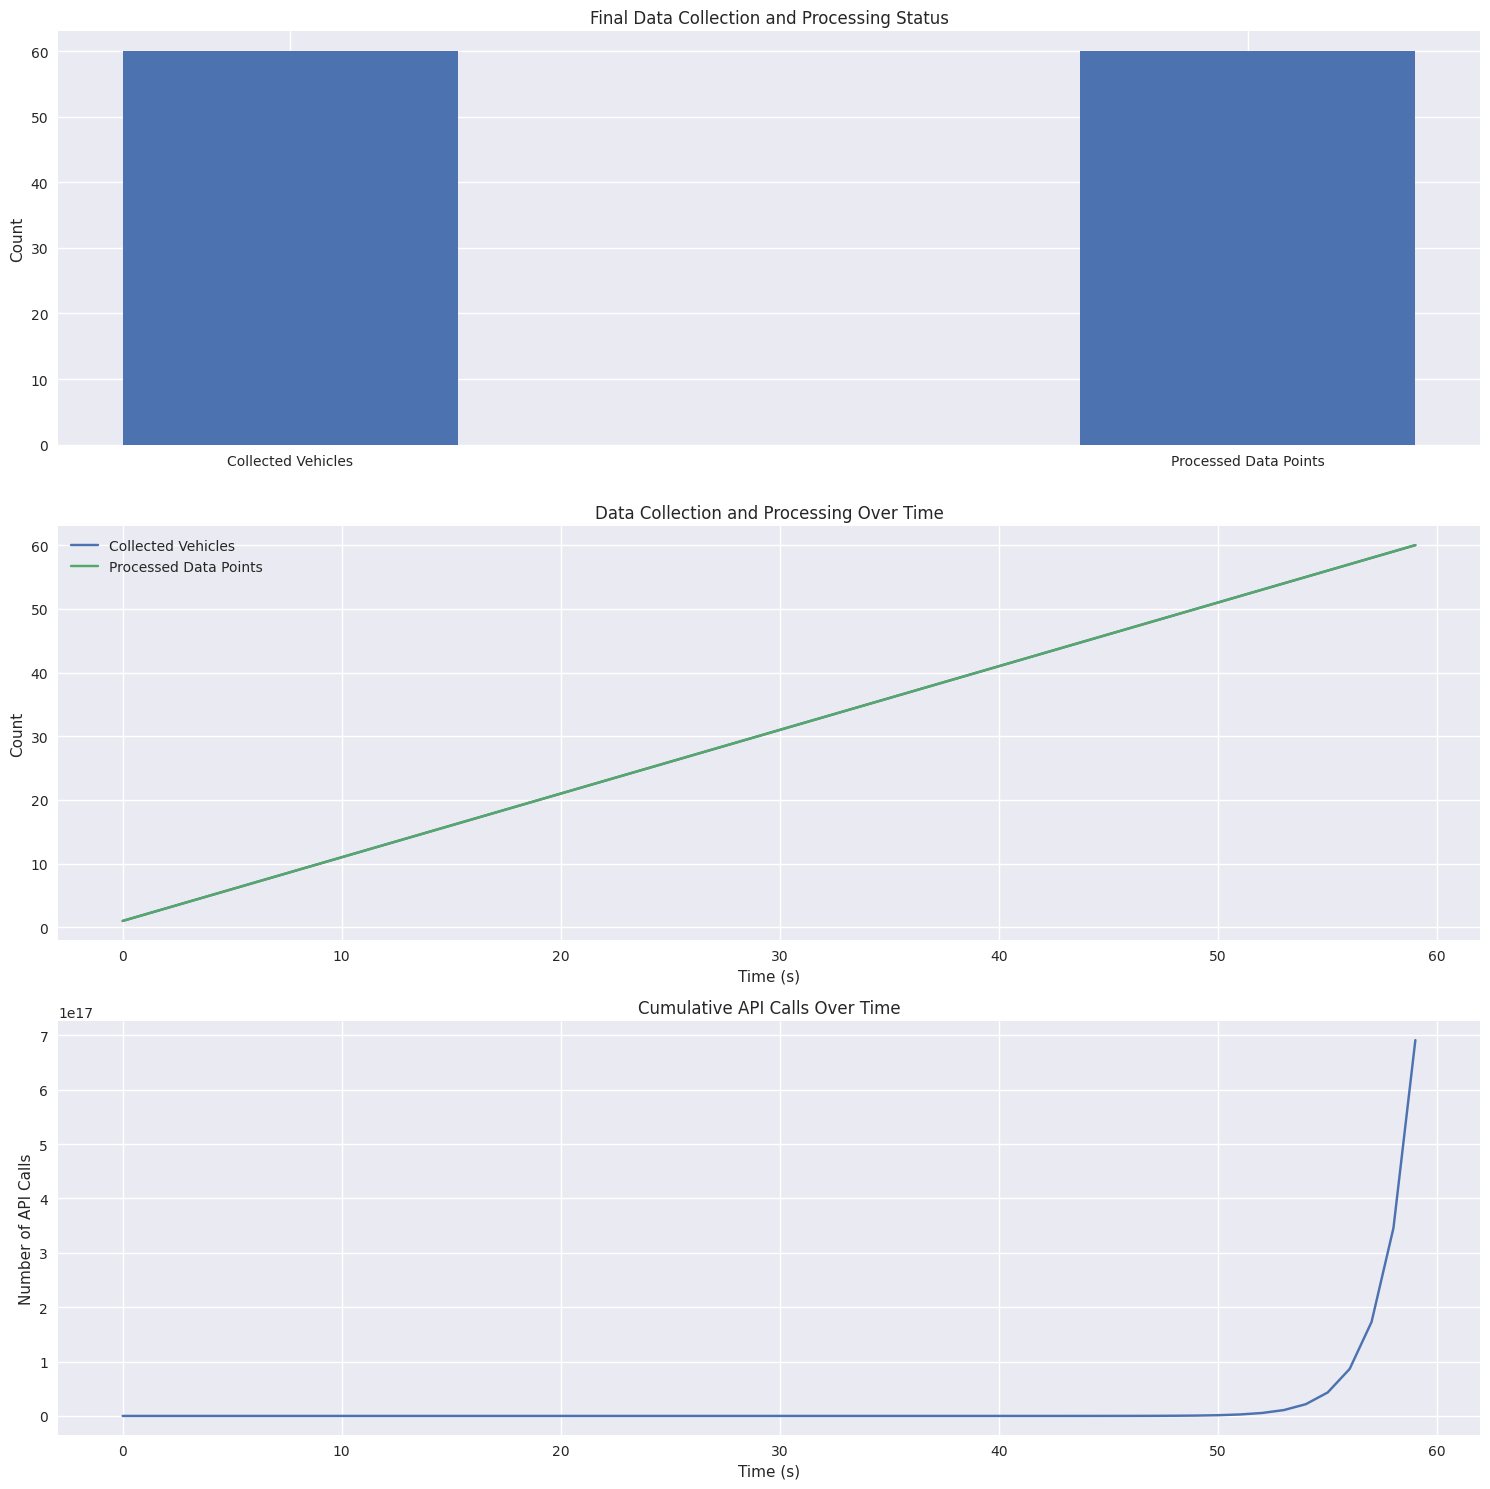

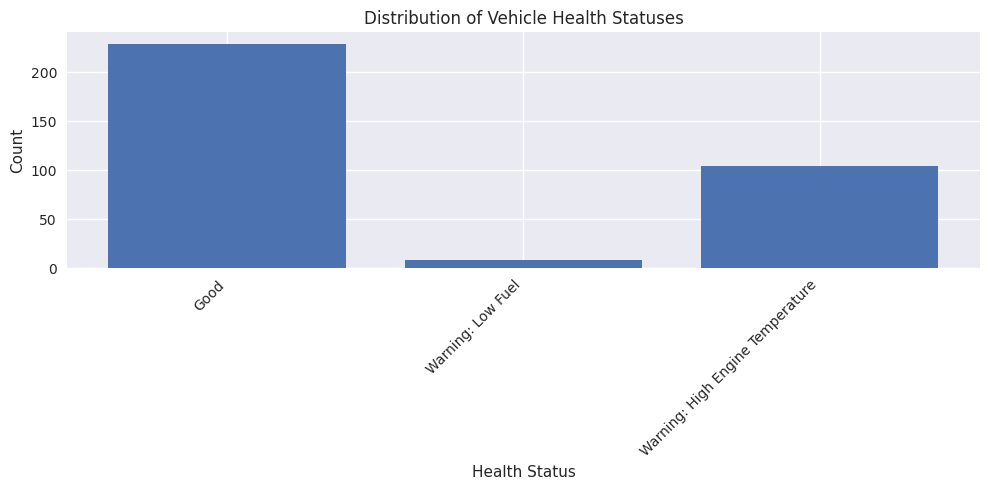


Simulation complete


In [13]:

# Create plots
plt.figure(figsize=(15, 15))

# Plot 1: Data Collection and Processing
plt.subplot(3, 1, 1)
plt.bar(np.arange(2), [collected_data[-1], processed_data[-1]], width=0.35, 
        tick_label=['Collected Vehicles', 'Processed Data Points'])
plt.title('Final Data Collection and Processing Status')
plt.ylabel('Count')

# Plot 2: Data Collection and Processing Over Time
plt.subplot(3, 1, 2)
plt.plot(collected_data, label='Collected Vehicles')
plt.plot(processed_data, label='Processed Data Points')
plt.title('Data Collection and Processing Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.legend()

# Plot 3: API Calls Over Time
plt.subplot(3, 1, 3)
plt.plot(api_calls)
plt.title('Cumulative API Calls Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Number of API Calls')

plt.tight_layout()
plt.show('telematics_summary')
plt.close()

# Plot 4: Vehicle Health Status Distribution
plt.figure(figsize=(10, 5))
health_status_counts = {status: health_statuses.count(status) for status in set(health_statuses)}
plt.bar(health_status_counts.keys(), health_status_counts.values())
plt.title('Distribution of Vehicle Health Statuses')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show('health_status_distribution')

print("\nSimulation complete")